### Data Mining and Machine Learning
###  Clustering using DBSCAN and  Gaussian Mixtures
#### Edgar Acuna
#### Abril 2020

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Example 1. DBSCAN OUTPERFORMS KMEANS

In [98]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/exdbscan1.csv")
df.head()

,x,y
0,-0.803739,-0.853053
1,0.852851,0.367618
2,0.927180,-0.274902
3,-0.752626,-0.511565
4,0.706846,0.810679


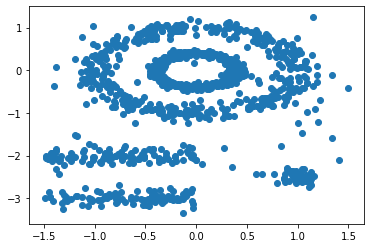

In [99]:
plt.scatter(df['x'],df['y'])

In [100]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
clustlabels=kmeans.labels_
print(clustlabels)

[0 2 2 ... 1 1 1]


['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628']


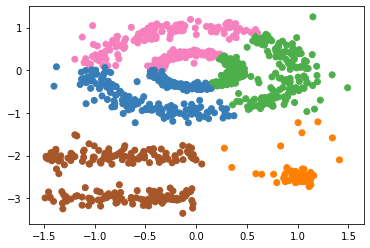

In [101]:
 colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(clustlabels) + 1))))
print(colors)
plt.scatter(df['x'], df['y'],color=colors[clustlabels])

In [102]:
eps=.2
dbscan = DBSCAN(eps,min_samples=10).fit(df)
print(dbscan.labels_)

[0 0 0 ... 4 4 4]


['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628']


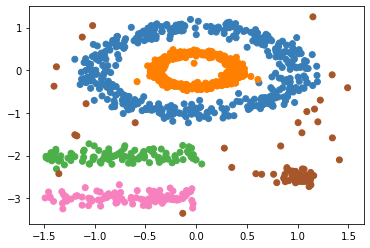

In [103]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(dbscan.labels_) + 1))))
print(colors)
plt.scatter(df['x'], df['y'],color=colors[dbscan.labels_])

### Example 2: DBSCAN outperforms Kmmeans

In [104]:
df1 = pd.read_csv("https://academic.uprm.edu/eacuna/t48k.csv", delim_whitespace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
x    8000 non-null float64
y    8000 non-null float64
dtypes: float64(2)
memory usage: 125.1 KB


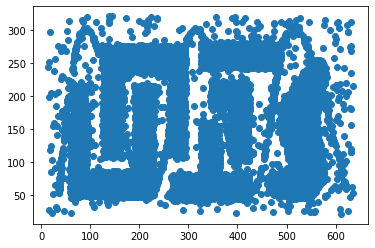

In [105]:
plt.scatter(df1['x'],df1['y'])

#### The data shows 6 clusters

In [106]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df1)
clustlabels=kmeans.labels_
print(clustlabels)

[3 0 3 ... 4 1 1]


['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628' '#984ea3']


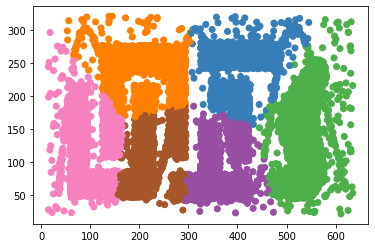

In [107]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(clustlabels) + 1))))
print(colors)
plt.scatter(df1['x'], df1['y'],color=colors[clustlabels])

#### Kmeans does not get the right clusters

In [108]:
eps=10
db = DBSCAN(eps,min_samples=20).fit(df1)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#Printing the number of outliers and the number of clusters
print("There are", n_noise_,"and", n_clusters_, "clusters")

There are 653 and 6 clusters


['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628' '#984ea3' '#999999']


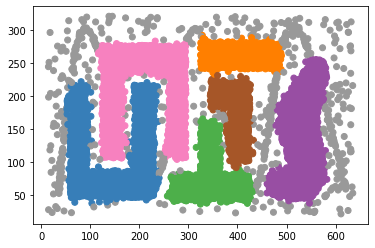

In [109]:
#Pltting the six clusters and the outliers 
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(labels) + 2))))
print(colors)
plt.scatter(df1['x'], df1['y'],color=colors[labels])

### Example 3. Clustering the Diabetes Dataset using DBSCAN

In [110]:
url= "c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
yd=data['class']
Xd=data.iloc[:,0:8]
scaler = StandardScaler()
scaler.fit(Xd)
Xd= scaler.transform(Xd)

In [111]:
eps=1.5
dbscan = DBSCAN(eps,min_samples=10).fit(Xd)
dbscanlabels=dbscan.labels_
pd.crosstab(dbscanlabels,yd)

class,1,2
row_0,,
-1,106,135
0,394,133


### IV.  Clustering using Gaussian Mixtures

In [112]:
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full')
gm=gmm.fit(df)
pred=gm.predict(df)

['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628']


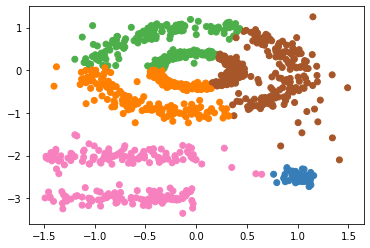

In [113]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(pred) + 1))))
print(colors)
plt.scatter(df['x'], df['y'],color=colors[pred])

In [114]:
gmm1= mixture.GaussianMixture(n_components=5, covariance_type='diag')
gm1=gmm1.fit(df)
pred1=gm1.predict(df)

['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628']


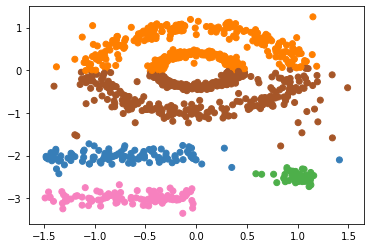

In [115]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(pred1) + 1))))
print(colors)
plt.scatter(df['x'], df['y'],color=colors[pred1])

In [116]:
gmm2= mixture.GaussianMixture(n_components=5, covariance_type='spherical')
gm2=gmm2.fit(df)
pred2=gm2.predict(df)

['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628']


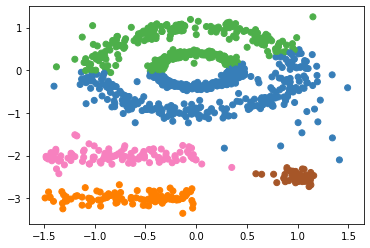

In [117]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(pred2) + 1))))
print(colors)
plt.scatter(df['x'], df['y'],color=colors[pred2])

In [118]:
gmm3= mixture.GaussianMixture(n_components=5, covariance_type='tied')
gm3=gmm3.fit(df)
pred3=gm3.predict(df)

['#377eb8' '#ff7f00' '#4daf4a' '#f781bf' '#a65628']


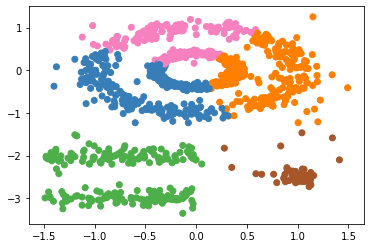

In [119]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(pred3) + 1))))
print(colors)
plt.scatter(df['x'], df['y'],color=colors[pred3])

### Choosing the optimal number of clusters using the BIC

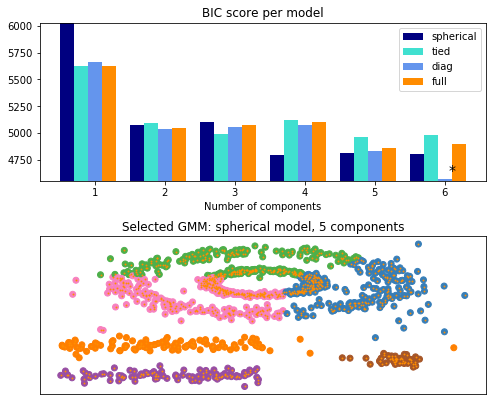

In [120]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(df)
        bic.append(gmm.bic(df))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm

bars = []
# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
# Plot the winner
splot = plt.subplot(2, 1, 2)
predy= clf.predict(df)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(predy) + 1))))
plt.scatter(df['x'], df['y'],color=colors[predy])
plt.scatter(df['x'], df['y'], .8, color=color)
plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: spherical model, 5 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

### V. Applying Gaussian Mixture for clustering diabetes

In [121]:
gmm = mixture.GaussianMixture( n_components=2, covariance_type='full')
gm=gmm.fit(Xd)
pred=gmm.predict(Xd)

In [122]:
pd.crosstab(pred,yd)

class,1,2
row_0,,
0,211,203
1,289,65
